This notebook reproduces Figure S5 in "Integrating human biophysics and data-driven analysis to assess humidity’s role in heatstroke prediction" by Kong et al.

In [1]:
"""
import python packages
please install required packages before running this notebook
"""
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import regionmask
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# read in pearson correlation coefficient between summer average temperature and vapor pressure
corr=xr.open_dataset('../data/corr.nc')['corr']
# create land mask for plotting
landmask = regionmask.defined_regions.natural_earth.land_50.mask(corr,lon_name="longitude",lat_name="latitude")

In [3]:
# create colormap
colors=np.array([[8,48,107],
                 [8,81,156],
                 [33,113,181],
                 [66,146,198],
                 [107,174,214],
                 [158,202,225],
                 [198,219,239],
                 [222,235,247],
                 [247,251,255],
                 [255,255,255],
                 [255,245,240],
                 [254,224,210],
                 [252,187,161],
                 [252,146,114],
                 [251,106,74],
                 [239,59,44],
                 [203,24,29],
                 [165,15,21],
                 [103,0,13]]
               )
cmap=mpl.colors.ListedColormap(colors/255.)

In [4]:
def subplot(data,axis,norm,cmap,LON,LAT):
    g=axis.pcolormesh(LON, LAT,data.where(landmask==0),
                      transform=ccrs.PlateCarree(),
                      cmap=cmap,norm=norm,rasterized=True) 

    axis.coastlines(linewidth=0.5,resolution='50m') # add coastlines
    axis.set_title('')
    axis.set_extent([-169.999,189.999,-60,75]) # set extent of the map to exclude high latitudes
    return g


def plot(data):
    fig = plt.figure(figsize=[8,6])
    levels=np.array([-9, -8, -7, -6, -5, -4, -3, -2, -1, 1,  2,  3,  4,  5,  6,  7,8,  9])/10
    norm=mpl.colors.BoundaryNorm(levels,ncolors=len(levels)+1,extend='both')
    clabel='Correlation'
    LON,LAT=np.meshgrid(data.longitude.values,data.latitude.values)
    ax = fig.add_subplot(111,projection=ccrs.Robinson(central_longitude=10))
    g=subplot(data,ax,norm,cmap,LON,LAT)
    
    fig.subplots_adjust(bottom=0, left=0,right=1, top=1,hspace=-0.5,wspace=0.05)
    cb=fig.colorbar(g,ax=ax,orientation='horizontal',pad=0.02,
                    shrink=0.8,fraction=.08,aspect=70,spacing='proportional',
                    ticks=[-0.9, -0.7, -0.5, -0.3, -0.1,0.1,0.3,0.5,0.7,0.9])
    tick_labels=[ '-0.9',   '-0.7',   '-0.5',   '-0.3',  '-0.1',  '0.1',  '0.3',  '0.5',  '0.7', '0.9']
    cb.set_ticklabels(tick_labels)
    cb.set_label(label=clabel,size=16)
    cb.ax.tick_params(labelsize=14)

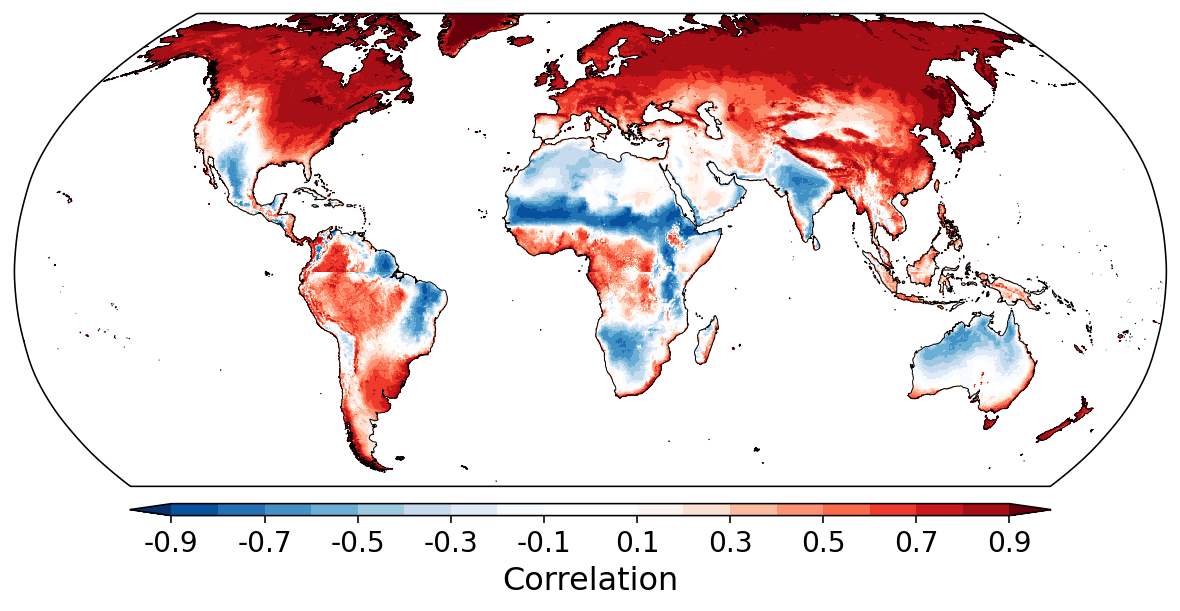

In [5]:
plot(corr)

**Fig. S5.** Pearson correlation between daily mean air temperature and vapor pressure during June–September for the northern hemisphere and December–March for the southern hemisphere during 2010–2019.